<a href="https://www.kaggle.com/mickaelnarboni/seattle-co2-siteenergyusewn-kbtu-2016?scriptVersionId=85971290" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mathematical Considerations

In order to define the best predictive model in the frame of our project, we'll use some scoring metrics for each model.
We are using **regression** models to predict our output because we work with continuous data.

The **Mean Squared Error**, **Mean Absolute error**, **Root Mean Squared Error**, and **R-Squared or Coefficient of determination** metrics are used to evaluate the performance of the model in regression analysis.

**Mean Absolute Error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

<div style="width:100%;text-align: center;">
<img align=middle src="https://i.imgur.com/BmBC8VW.jpg" width="350"/>
    
 
**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<div style="width:100%;text-align: center;">
<img align=middle src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" width="330"/>
    
 
**Root Mean Squared Error** is the **square root of Mean Squared error**. It measures the standard deviation of residuals.
 
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="300"/>
   

**The coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
    
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/1400/0*8rFYfZJfJZpW2cEV.png" width="440"/>

# Set up Environment

We import all the relevant librairies to display our models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from time import process_time

# calling our libraries for our models

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from math import sqrt
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import validation_curve
from sklearn import preprocessing


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sea-building-energy-benchmarking/clean_p3.csv
/kaggle/input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/archive/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
import pandas as pd
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
data = pd.read_csv('../input/sea-building-energy-benchmarking/clean_p3.csv',sep='\t', low_memory=False, index_col=[0])
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3353,50090,2016,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,Seattle,WA,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,2015,1.0,7,63825,4850,58975,Multifamily Housing,Multifamily Housing,71241.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,2.493278e+06,0.0,4.407752e+05,1503925.0,8337.259766,833726.0,False,Compliant,54.76,0.86
3354,50092,2016,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,1101 NE Campus Pkwy,Seattle,WA,98195.0,1142002345,4,NORTHEAST,47.65577,-122.31702,2015,1.0,7,325000,0,325000,Residence Hall/Dormitory,Residence Hall/Dormitory,325000.0,69.0,50.700001,53.599998,109.900002,113.000000,1.646749e+07,1.743013e+07,0.0,2.583406e+06,8814581.0,76529.031250,7652903.0,False,Compliant,467.90,1.44
3355,50093,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,Seattle,WA,98104.0,9822000080,3,EAST,47.60189,-122.32182,2015,1.0,6,86045,8908,77137,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,2.161240e+06,0.0,6.334232e+05,2161240.0,0.000000,0.0,False,Compliant,15.07,0.18
3357,50095,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,4745 40th Ave SW,Seattle,WA,98116.0,7579200395,1,SOUTHWEST,47.55976,-122.38320,2015,1.0,7,208136,58818,149318,"Multifamily Housing, Parking",Multifamily Housing,168221.0,100.0,21.100000,21.100000,46.900002,46.900002,3.552185e+06,3.552185e+06,0.0,5.828756e+05,1988772.0,15634.129880,1563413.0,False,Compliant,96.90,0.47
3358,50098,2016,Multifamily LR (1-4),Low-Rise Multifamily,1806,1806 23rd Avenue,Seattle,WA,98122.0,1407300010,3,CENTRAL,47.61791,-122.30230,2014,1.0,4,20246,2580,17666,Multifamily Housing,Multifamily Housing,17666.0,99.0,44.700001,45.000000,106.099998,106.400002,7.898472e+05,7.952111e+05,0.0,1.465200e+05,499926.0,2899.209961,289921.0,False,Compliant,18.88,0.93


# Convert Continuous Variables into Discrete Values

At the difference of LabelEncoder(), **OneHotEncoder()** does not create a hierarchy in the numerical values. In our case, we don't have hierarchy in our modalities, so we'll definitely use this class to convert the string into numerical values. 

We're going to use on the categorical variables that did interest us during the exploratory phase:

- BuildingType
- PrimaryPropertyType
- Neighborhood

In [3]:
enc = data[['BuildingType','PrimaryPropertyType','Neighborhood']]
data = data.drop(columns=['BuildingType','PrimaryPropertyType','Neighborhood'])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

# passing our categorical columns (label encoded values)

categorical_features = pd.DataFrame(encoder.fit_transform(enc))

# label the encoded columns with the features of the original variables

categorical_features.columns = encoder.get_feature_names(['BuildingType','PrimaryPropertType','Neighborhood'])

# merge with main dataframe

enc_data = data.join(categorical_features, how="inner")
enc_data

,OSEBuildingID,DataYear,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1,2016,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,Compliant,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2016,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,Compliant,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,Compliant,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2016,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,Compliant,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2016,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool"

# Features and Predictive Variable for Energy Use

We import our features in a dataframe called X which will contain all the numerical (discrete) variables that do predict our predictive variable

As predictive variable to predict the total consumption of a property in Seattle, we decide to pick *SiteEnergyUseWN(kBtu)* that seems the most representative of our real case study, which means that the lower *SiteEnergyUseWN(kBtu)* is, the lower the consumption of the building will be.

*SiteEnergyUseWN(kBtu)* is contained in our y dataframe for predictions

In [5]:
# Create the dataframe that will contain all our features for modeling

X = pd.concat([enc_data.loc[:,'PropertyGFATotal':'PropertyGFABuilding(s)'],enc_data.loc[:,'LargestPropertyUseTypeGFA':'SiteEnergyUse(kBtu)'],enc_data.loc[:,'SteamUse(kBtu)':'NaturalGas(kBtu)'],enc_data.loc[:,'TotalGHGEmissions':'Neighborhood_SOUTHWEST']],1).copy()
X = pd.DataFrame(X)
X.head()

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = enc_data.loc[:,'SiteEnergyUseWN(kBtu)']
y = pd.DataFrame(y).astype('int32')

# Correlation Matrix

We re-insert our correlation matrix from our exploratory phase because we notice some overfitting between our test and training datasets while creating the models.

We're working on predicting the variable *TotalGHGEmissions* so we want to define a threshold by which we'll not take in consideration the variables in our X features to not give too many degrees of freedom to our models.

By observing the correlation matrix, we gather the variables that are correlated to our predictive variable with a correlation above 40%.

- PropertyGFATotal
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu)
- GHGEmissionsIntensity

From this list, we also notice that some variables are highly correlated between them such as:

- **PropertyGFATotal**, **PropertyGFABuilding(s)** and **LargestPropertyUseTypeGFA**
- **SiteEnergyUse(kBtu)** and **SiteEnergyUseWN(kBtu)**
- **Electricity(kWh)** and **Electricity(kBtu)**
- **NaturalGas(therms)** and **NaturalGas(kBtu)**

We decide to keep **PropertyGFABuilding(s)** because it get a more accurate description of the building GFA and drop the two other correlated variables.
We decide to keep  **SiteEnergyUseWN(kBtu)** over SiteEnergyUse(kBtu).
We decide to keep the **Electricity(kBtu)** and **NaturalGas(kBtu)** because of there are measured in the same units so we keep a certain homogeneity in our data.

Finally, we decide to drop the following variables that are too coreelated to one another:

- PropertyGFATotal
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- NaturalGas(therms)
- GHGEmissionsIntensity

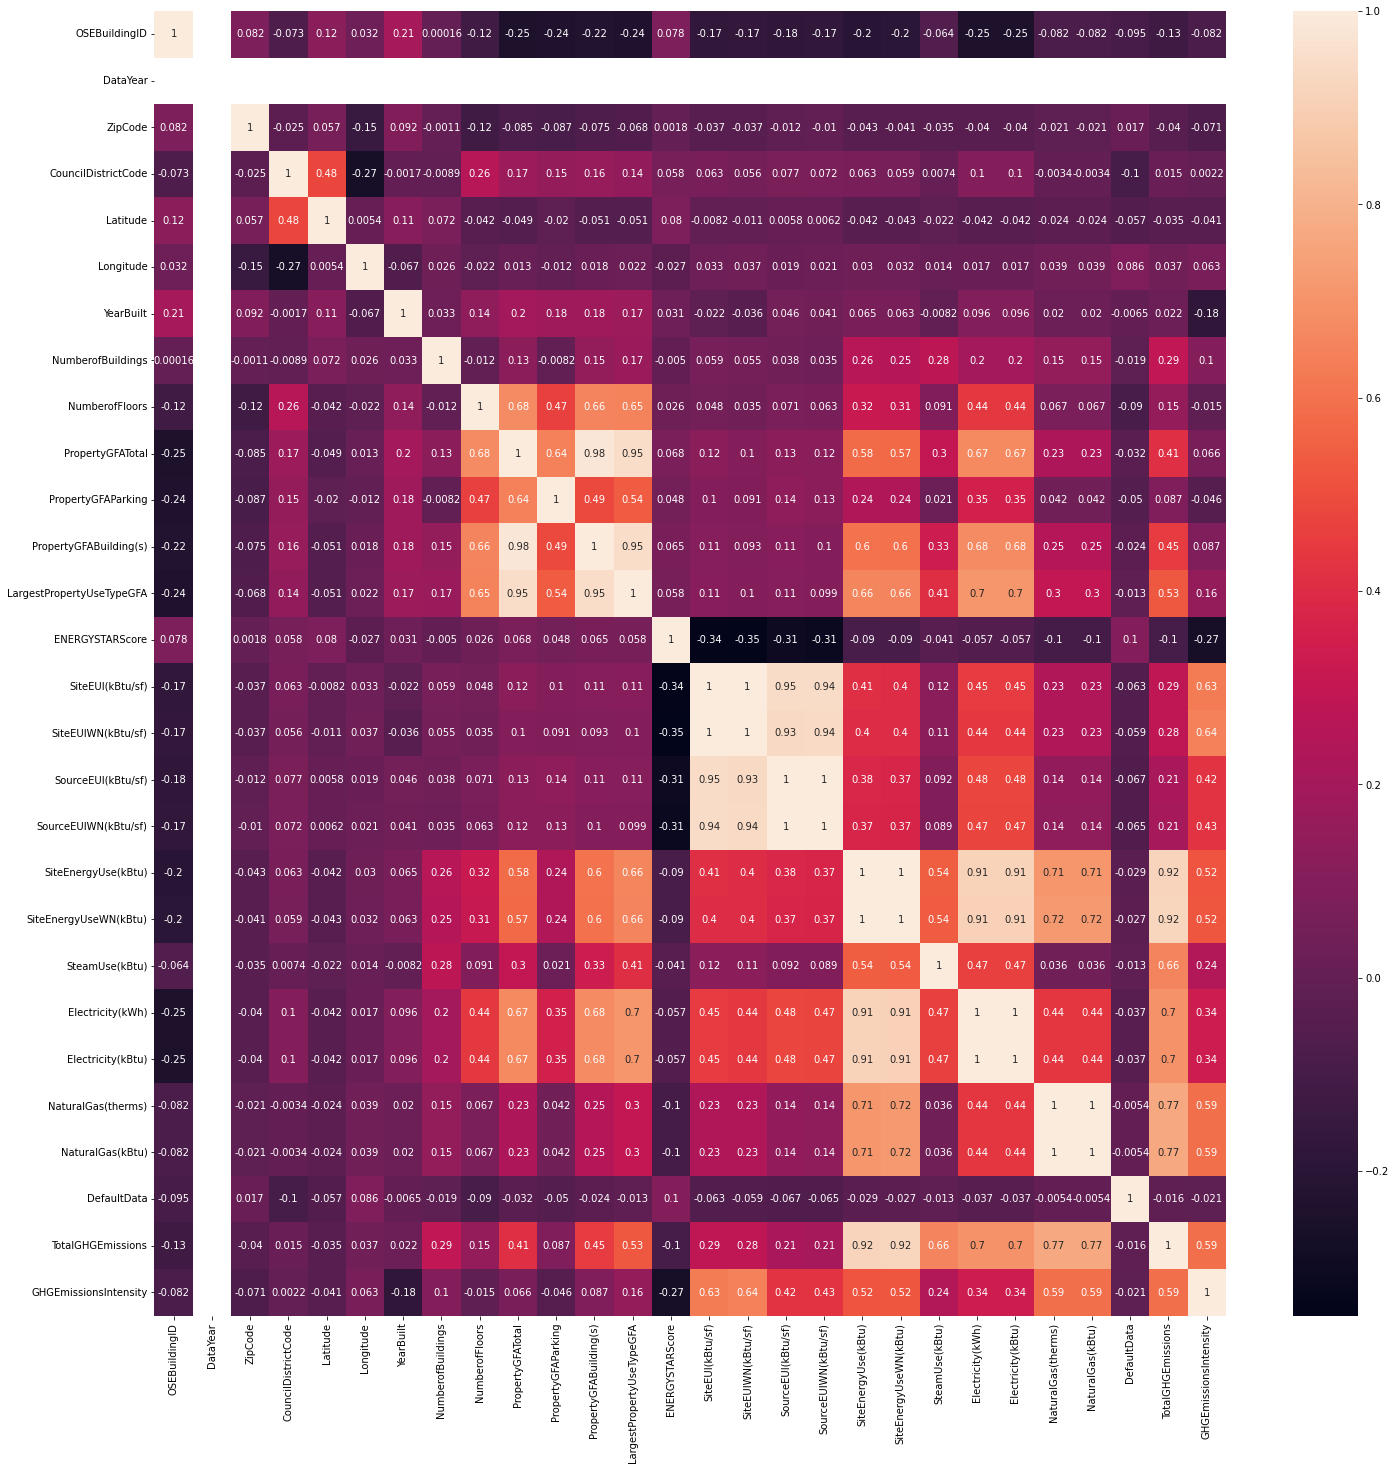

In [7]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
X = X.drop(columns=['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,3946027.0,1276453.0,249.98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,3242851.0,5145082.0,295.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,49526664.0,1493800.0,2089.28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,2768924.0,1811213.0,286.43,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,5368607.0,8803998.0,505.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Notes about Cross Validation

To start creating ML models, we gotta do cross-validation of our data which means dividing our dataset into a training set and a testing set.
To do so, usually, we divide our data into a certain number of blocks, for instance:

- Ten Fold Blocks Cross Validation (10 blocks)
- Four Fold Blocks Cross Validation (4 blocks)

Then we can use our different models (logistic regression, KNN, SVM...) on our training set, compare them and see which one is the most fittable to our data.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- Kernel is the mathematical function used to define the hyperparameter and it can be: linear, polynomial, rbf for instance.

Generally cross validation is used for two purposes:

- Defining the best hyperparameters for the model

- Test the model on different data points

# Features Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

MDI = Mean Decrease in Impurity 

In [9]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)[:10]
    feature_names = np.array(names)[:10]
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type +  ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Support Vector Regression

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.



In [10]:
from sklearn.svm import SVR

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

#call the model
svr = SVR()

# define values for hyperparameters
kernel = ['poly']
degree = [1] # linear
C = [200]

# Create the random grid
svr_grid = {'kernel': kernel, 'degree': degree, 'C': C}

# cross validation to tune hyperparameter
gsvr = GridSearchCV(svr, param_grid = svr_grid, cv=KFold(n_splits=5,shuffle=True))

# train our models with the parameters we indicated
gsvr.fit(X_train, y_train)

#Predict the response for test dataset
y_svr_test_pred = gsvr.predict(X_test)
y_svr_train_pred = gsvr.predict(X_train)

# mean error square
svr_test_mae = mean_absolute_error(y_test, y_svr_test_pred)
svr_train_mae = mean_absolute_error(y_train, y_svr_train_pred)

# best hyperparameter
gsvr_param = gsvr.best_params_

# The mean squared error
svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)

# The coefficient of determination: 1 is perfect prediction
svr_test_r2 = r2_score(y_test, y_svr_test_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

# The root mean squared error
svr_test_rmse = sqrt(mean_squared_error(y_test, y_svr_test_pred))
svr_train_rmse = sqrt(mean_squared_error(y_train, y_svr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run SVR:", svr_time) 

Elapsed time in seconds to run SVR: 1.1396627650000006


In [11]:
# cross validation

cv_svr_train = cross_val_score(gsvr, X_train, y_svr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_svr_test = cross_val_score(gsvr, X_test, y_svr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_svr = {'Training Dataset':cv_svr_train,'Test Dataset':cv_svr_test}
cv_svr_results = pd.DataFrame(d_svr).transpose()
cv_svr_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_svr_results)

                   Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.99771  0.925156  0.943211  0.998078  0.920661
Test Dataset      1.00000  1.000000  1.000000  1.000000  1.000000


In [12]:
svr_results = pd.DataFrame(['SVR', svr_time, gsvr_param, svr_train_mae, svr_test_mae, svr_train_mse, svr_test_mse, svr_train_rmse, svr_test_rmse, svr_train_r2, svr_test_r2]).transpose()
svr_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097


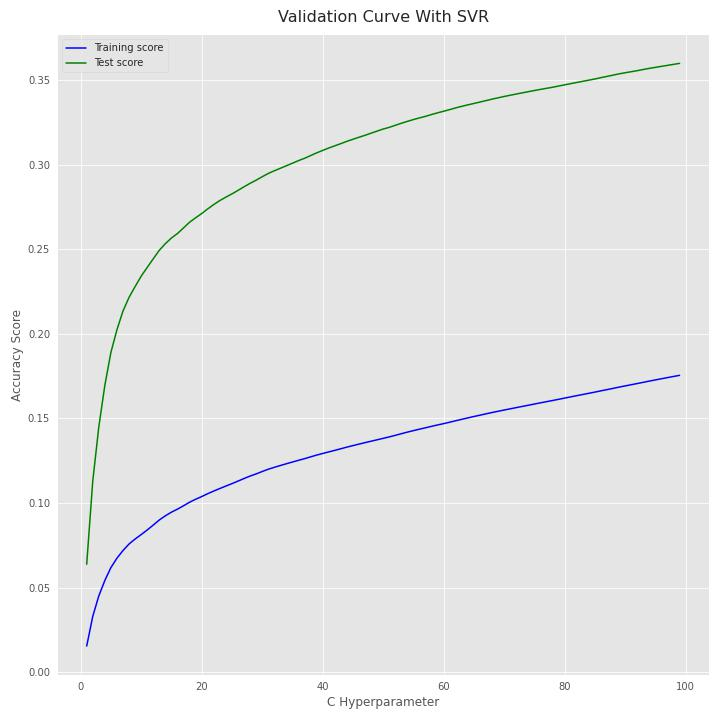

# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
grad_boosting = GradientBoostingRegressor(validation_fraction=0.2, n_iter_no_change=5, tol=0.01) # creation of early stopping to avoid future overfitting in our model

# define values for hyperparameters
learning_rate = [0.75]
n_estimators = [20]
max_features = [12]
alpha = [0.85]
max_leaf_nodes = [20]
min_samples_leaf = [4]
min_weight_fraction_leaf = [0.39]
max_depth = [7]
min_impurity_decrease = [0.5]

# Create the random grid
gboosting_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features, 'alpha': alpha, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_leaf':min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_boosting = GridSearchCV(grad_boosting, param_grid = gboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
grad_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_grad_boosting_test_pred = grad_boosting.predict(X_test)
y_grad_boosting_train_pred = grad_boosting.predict(X_train)

# fit the grid
g_boosting.fit(X_train, y_train)

# best hyperparameter
g_boosting_param = g_boosting.best_params_

# The mean absolute error
grad_boosting_test_mae = mean_absolute_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mae = mean_absolute_error(y_train, y_grad_boosting_train_pred)

# The mean squared error
grad_boosting_test_mse = mean_squared_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mse = mean_squared_error(y_train, y_grad_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
grad_boosting_test_r2 = r2_score(y_test, y_grad_boosting_test_pred)
grad_boosting_train_r2 = r2_score(y_train, y_grad_boosting_train_pred)

# The root mean squared error
grad_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_grad_boosting_test_pred))
grad_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_grad_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor:", grad_boosting_time)

Elapsed time in seconds to run Gradient Boosting Regressor: 0.35269680600000086


In [14]:
# cross validation

cv_grad_boosting_train = cross_val_score(g_boosting, X_train, y_grad_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_grad_boosting_test = cross_val_score(g_boosting, X_test, y_grad_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_grad_boosting = {'Training Dataset':cv_grad_boosting_train,'Test Dataset':cv_grad_boosting_test}
cv_grad_boosting_results = pd.DataFrame(d_grad_boosting).transpose()
cv_grad_boosting_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_grad_boosting_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.066239  0.215767  0.125386  0.111625  0.261439
Test Dataset      0.223599  0.156640  0.079479  0.257441  0.056504


In [15]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
grad_boosting_results = pd.DataFrame(['Gradient Boosting', grad_boosting_time, g_boosting_param, grad_boosting_train_mae, grad_boosting_test_mae, grad_boosting_train_mse, grad_boosting_test_mse, grad_boosting_train_rmse, grad_boosting_test_rmse, grad_boosting_train_r2, grad_boosting_test_r2]).transpose()
grad_boosting_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754


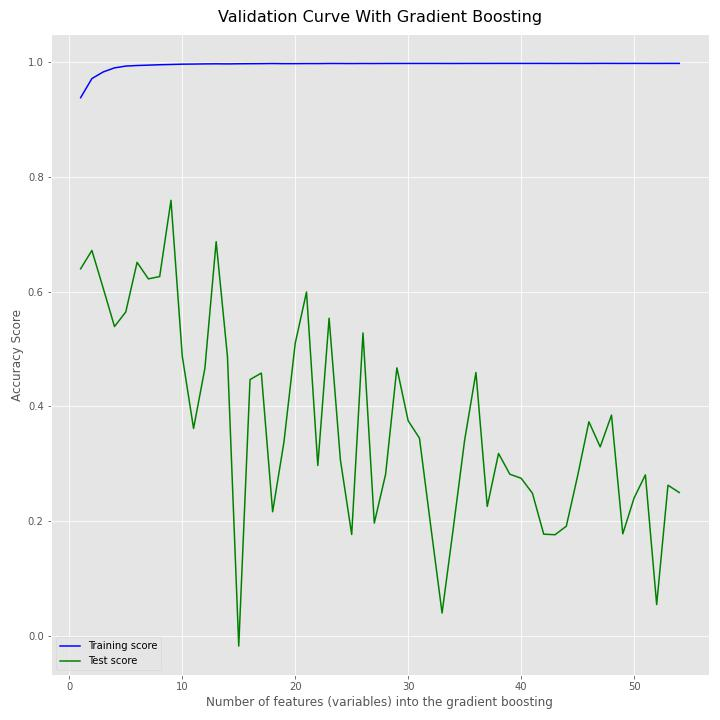

# Bagging for Regression

In [16]:
from sklearn.ensemble import BaggingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a RF classifier
reg_bagging = BaggingRegressor() 

# define values for hyperparameters
n_estimators = [200]
max_features = [30]
max_samples = [100]

# Create the random grid
rbag_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_samples':max_samples}

# cross validation to tune hyperparameter
g_rbag = GridSearchCV(reg_bagging, param_grid = rbag_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
reg_bagging.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_reg_bagging_test_pred = reg_bagging.predict(X_test)
y_reg_bagging_train_pred = reg_bagging.predict(X_train)

# fit the grid
g_rbag.fit(X_train, y_train)

# best hyperparameter
g_rbag_param = g_rbag.best_params_

# The mean absolute error
reg_bagging_test_mae = mean_absolute_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mae = mean_absolute_error(y_train, y_reg_bagging_train_pred)

# The mean squared error
reg_bagging_test_mse = mean_squared_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mse = mean_squared_error(y_train, y_reg_bagging_train_pred)

# The coefficient of determination: 1 is perfect prediction
reg_bagging_test_r2 = r2_score(y_test, y_reg_bagging_test_pred)
reg_bagging_train_r2 = r2_score(y_train, y_reg_bagging_train_pred)

# The root mean squared error
reg_bagging_test_rmse = sqrt(mean_squared_error(y_test, y_reg_bagging_test_pred))
reg_bagging_train_rmse = sqrt(mean_squared_error(y_train, y_reg_bagging_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rbagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor:", rbagging_time)

Elapsed time in seconds to run Bagging Regressor: 3.656024691999999


In [17]:
# cross validation

cv_reg_bagging_train = cross_val_score(g_rbag, X_train, y_reg_bagging_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_reg_bagging_test = cross_val_score(g_rbag, X_test, y_reg_bagging_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_rbagging = {'Training Dataset':cv_reg_bagging_train,'Test Dataset':cv_reg_bagging_test}
cv_rbagging_results = pd.DataFrame(d_rbagging).transpose()
cv_rbagging_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_rbagging_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.852353  0.402807  0.444626  0.533343  0.861971
Test Dataset      0.911723  0.928454  0.656470  0.927436  0.633419


In [18]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for bagging hyperparameter
reg_bagging_results = pd.DataFrame(['Bagging Regression', rbagging_time, g_rbag_param, reg_bagging_train_mae, reg_bagging_test_mae, reg_bagging_train_mse, reg_bagging_test_mse, reg_bagging_train_rmse, reg_bagging_test_rmse, reg_bagging_train_r2, reg_bagging_test_r2]).transpose()
reg_bagging_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513


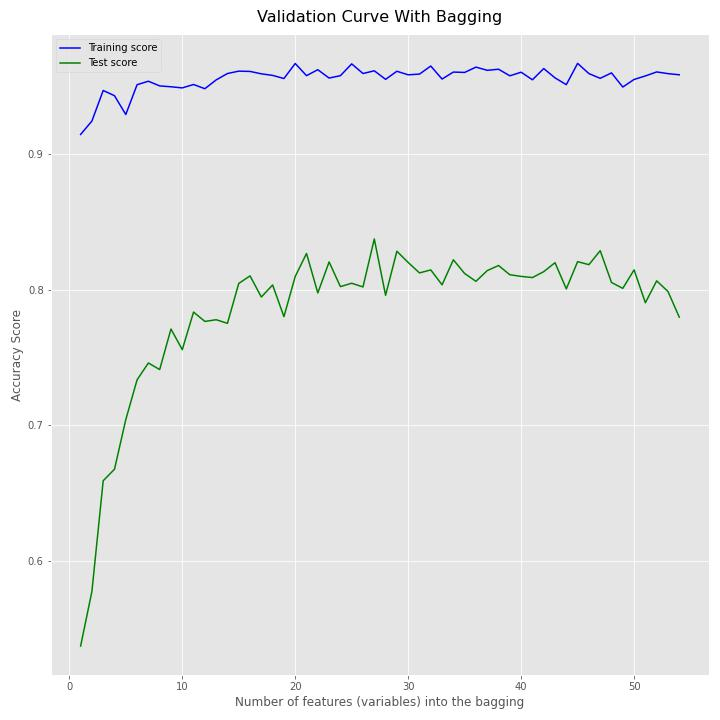

# Decision Trees

In [19]:
from sklearn.tree import DecisionTreeRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# Call the model 
tree = DecisionTreeRegressor()

# define values for hyperparameters
max_features = [20]
max_depth = [7]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [5]
min_impurity_decrease = [0.685]

# Create the random grid
tree_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_tree = GridSearchCV(tree, param_grid = tree_grid, cv=KFold(n_splits=5,shuffle=True))

# Performing training
tree.fit(X_train, y_train)

#Predict the response for test and train datasets
y_tree_test_pred = tree.predict(X_test)
y_tree_train_pred = tree.predict(X_train)

# mean error square
tree_test_mae = mean_absolute_error(y_test, y_tree_test_pred)
tree_train_mae = mean_absolute_error(y_train, y_tree_train_pred)

# fit the grid
g_tree.fit(X_train, y_train)

# best hyperparameter
g_tree_param = g_tree.best_params_

# The mean squared error
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)


# The coefficient of determination: 1 is perfect prediction
tree_test_r2 = r2_score(y_test, y_tree_test_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

# The root mean squared error
tree_test_rmse = sqrt(mean_squared_error(y_test, y_tree_test_pred))
tree_train_rmse = sqrt(mean_squared_error(y_train, y_tree_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
tree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Trees:", tree_time)

Elapsed time in seconds to run Decision Trees: 0.09111652600000042


In [20]:
# cross validation

cv_tree_train = cross_val_score(g_tree, X_train, y_tree_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_tree_test = cross_val_score(g_tree, X_test, y_tree_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_tree = {'Training Dataset':cv_tree_train,'Test Dataset':cv_tree_test}
cv_tree_results = pd.DataFrame(d_tree).transpose()
cv_tree_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_tree_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.850071  0.421005 -0.052658  0.925529  0.725815
Test Dataset      0.370272  0.608316  0.748588  0.852152  0.760461


In [21]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for random forest hyperparameter
decision_tree_results = pd.DataFrame(['Decision Tree', tree_time, g_tree_param, tree_train_mae, tree_test_mae, tree_train_mse, tree_test_mse, tree_train_rmse, tree_test_rmse, tree_train_r2, tree_test_r2]).transpose()
decision_tree_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699


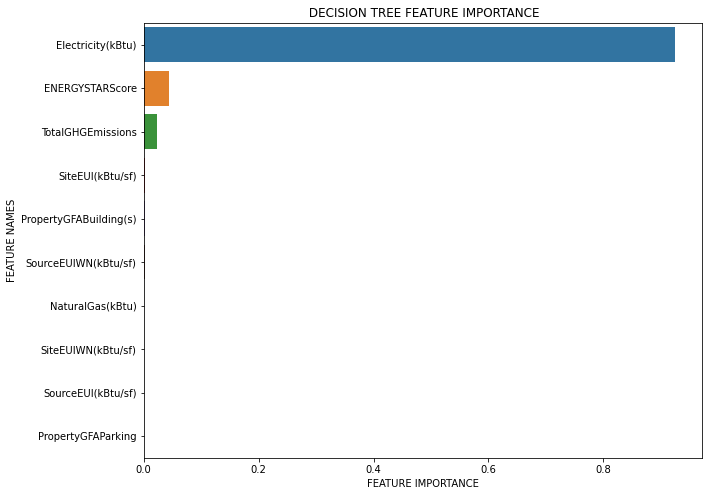

In [22]:
plot_feature_importance(tree.feature_importances_,X.columns,' DECISION TREE')

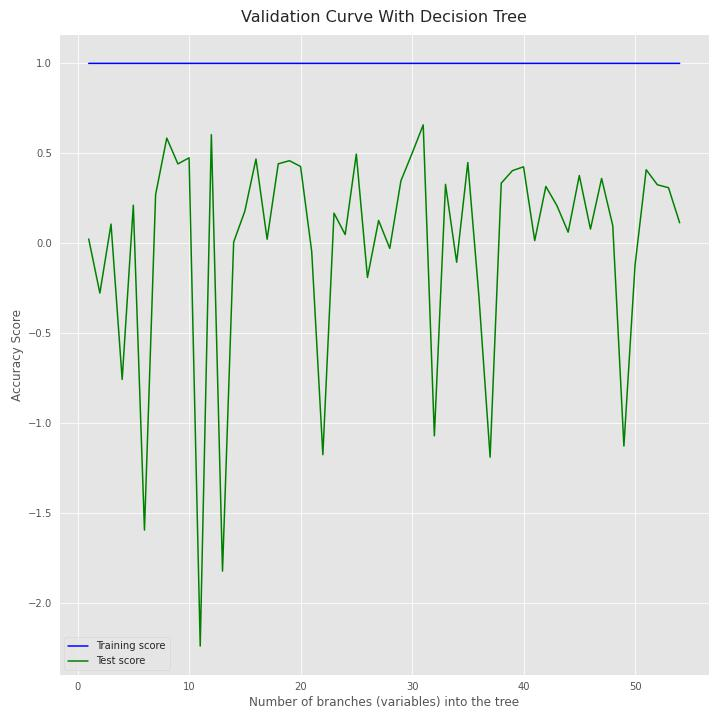

# XGBoost

In [23]:
import xgboost as xgb
import xgboost as XGBRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
xg_boosting = xgb.XGBRegressor() 

# define values for hyperparameters
eta = [0.2] 
alpha = [0.7]
gamma = [3]
max_depth = [12]
max_leaves = [4]
min_child_weight = [3]

# Create the random grid
xgboosting_grid = {'eta': eta, 'alpha': alpha, 'gamma': gamma, 'max_depth':max_depth, 'max_leaves':max_leaves, 'min_child_weight':min_child_weight}

# cross validation to tune hyperparameter
xg_boosting = GridSearchCV(xg_boosting, param_grid = xgboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
xg_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_xg_boosting_test_pred = xg_boosting.predict(X_test)
y_xg_boosting_train_pred = xg_boosting.predict(X_train)

# fit the grid
xg_boosting.fit(X_train, y_train)

# best hyperparameter
g_xgboosting_param = xg_boosting.best_params_

# The mean absolute error
xg_boosting_test_mae = mean_absolute_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mae = mean_absolute_error(y_train, y_xg_boosting_train_pred)

# The mean squared error
xg_boosting_test_mse = mean_squared_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mse = mean_squared_error(y_train, y_xg_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
xg_boosting_test_r2 = r2_score(y_test, y_xg_boosting_test_pred)
xg_boosting_train_r2 = r2_score(y_train, y_xg_boosting_train_pred)

# The root mean squared error
xg_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_xg_boosting_test_pred))
xg_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_xg_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
xg_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoosting Regressor:", xg_boosting_time)

Elapsed time in seconds to run XGBoosting Regressor: 29.736442761


In [24]:
# cross validation

cv_xg_boosting_train = cross_val_score(xg_boosting, X_train, y_xg_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_xg_boosting_test = cross_val_score(xg_boosting, X_test, y_xg_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_xg_boosting = {'Training Dataset':cv_xg_boosting_train,'Test Dataset':cv_xg_boosting_test}
cv_xg_boosting_results = pd.DataFrame(d_xg_boosting).transpose()
cv_xg_boosting_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_xg_boosting_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.979390  0.934065  0.841457  0.879102  0.859430
Test Dataset      0.904371  0.855363  0.932302  0.985669  0.868327


In [25]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
xg_boosting_results = pd.DataFrame(['XGBoosting', xg_boosting_time, g_xgboosting_param, xg_boosting_train_mae, xg_boosting_test_mae, xg_boosting_train_mse, xg_boosting_test_mse, xg_boosting_train_rmse, xg_boosting_test_rmse, xg_boosting_train_r2, xg_boosting_test_r2]).transpose()
xg_boosting_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317


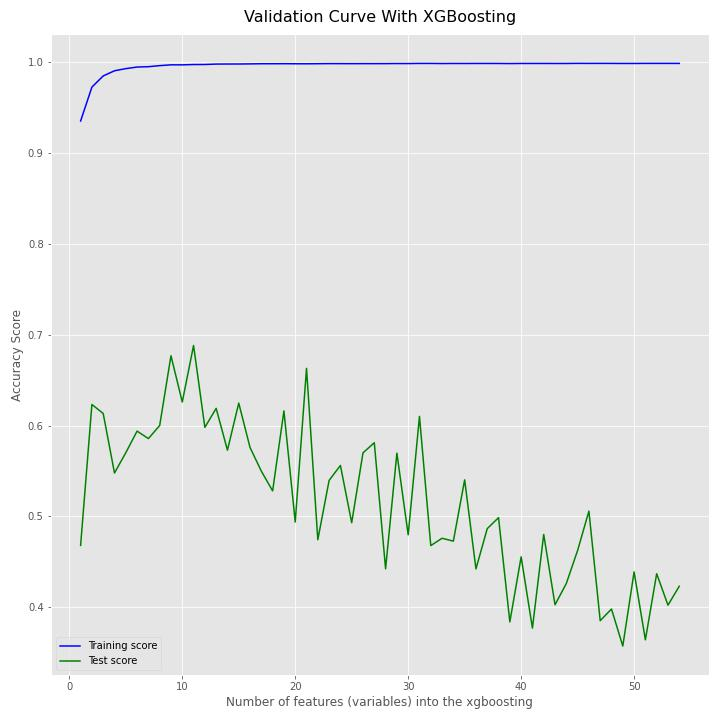

# Random Forests

In [26]:
# revoir les hyperparamètres de la random forest afin de réduire le temps de run

from sklearn.ensemble import RandomForestRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# create the model
rf = RandomForestRegressor() 

# define values for hyperparameters
n_estimators = [250]
max_features = [10]
max_depth = [8]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [7]
min_impurity_decrease = [0.65]

# Create the random grid
rf_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_rf = GridSearchCV(rf, param_grid = rf_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model 
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_rf_test_pred = rf.predict(X_test)
y_rf_train_pred = rf.predict(X_train)

# fit the grid
g_rf.fit(X_train, y_train)

# best hyperparameter
g_rf_param = g_rf.best_params_

# The mean absolute error
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

# The mean squared error
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

# The coefficient of determination: 1 is perfect prediction
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# The root mean squared error
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forest:", rf_time)

Elapsed time in seconds to run Random Forest: 5.137030326999991


In [27]:
# cross validation

cv_rf_train = cross_val_score(g_rf, X_train, y_rf_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_rf_test = cross_val_score(g_rf, X_test, y_rf_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_tree = {'Training Dataset':cv_rf_train,'Test Dataset':cv_rf_test}
cv_rf_results = pd.DataFrame(d_tree).transpose()
cv_rf_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_rf_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.837786  0.905888  0.754112  0.853339  0.646578
Test Dataset      0.709160  0.668582  0.750886  0.924147  0.876646


In [28]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for random forest hyperparameter
rf_results = pd.DataFrame(['Random Forest', rf_time, g_rf_param, rf_train_mae, rf_test_mae, rf_train_mse, rf_test_mse, rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results, rf_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317
5,Random Forest,5.13703,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}",272098.08402,287202.654725,5838087299257.402344,1001752946687.873413,2416213.421711,1000876.089577,0.988287,0.985868


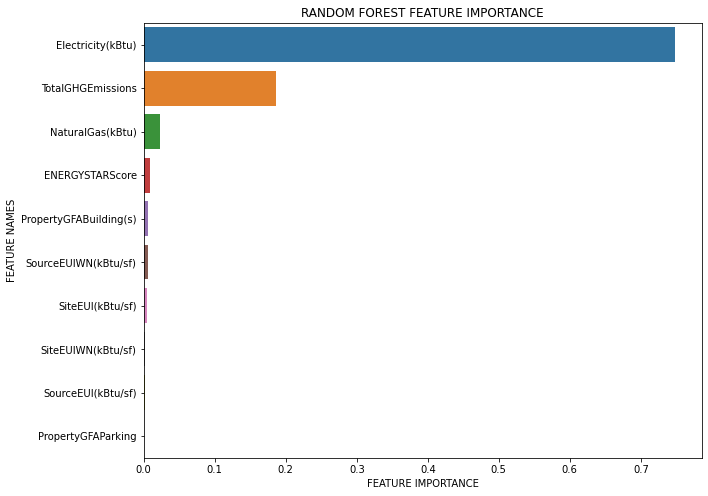

In [29]:
# features importance for random forest

plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')

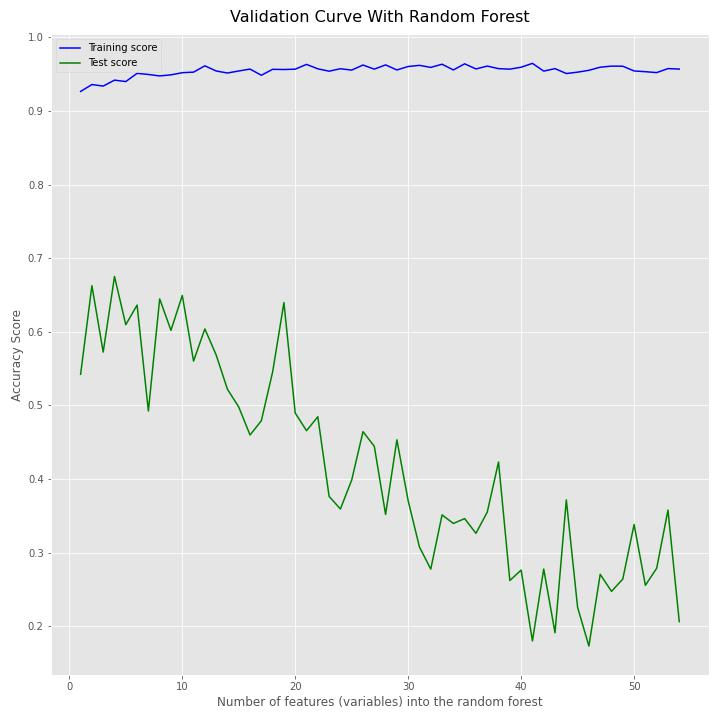

# Linear Regression Model (Simple/Least Squares)

More details here: https://realpython.com/linear-regression-in-python/

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

Simple linear regression is used to estimate the relationship between **two quantitative variables**. 

In [30]:
# We'll start by doing a Linear Regression using one variable to predict our variable TotalGHGEmissions

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

# start timer
t1_start = process_time()

# call the model
lr = linear_model.LinearRegression()

# train our model
lr.fit(X_train, y_train)

# Predict the response for test and train datasets
y_lr_test_pred = lr.predict(X_test)
y_lr_train_pred = lr.predict(X_train)

# mean error square
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

# The mean squared error
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# The coefficient of determination: 1 is perfect prediction
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# The root mean squared error
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Least Squares:", lr_time) 

Elapsed time in seconds to run Least Squares: 0.12573380700001735


In [31]:
# cross validation

cv_lr_train = cross_val_score(lr, X_train, y_lr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_lr_test = cross_val_score(lr, X_test, y_lr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_lr = {'Training Dataset':cv_lr_train,'Test Dataset':cv_lr_test}
cv_lr_results = pd.DataFrame(d_lr).transpose()
cv_lr_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_lr_results)

                  Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  1.0     0.999999  1.000000  1.000000  1.000000
Test Dataset      1.0     1.000000  0.999993  0.999994  0.999997


In [32]:
lr_results = pd.DataFrame(['Least Squares', lr_time, lr_train_mae, lr_test_mae, lr_train_mse, lr_test_mse, lr_train_rmse, lr_test_rmse, lr_train_r2, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Elapsed Time', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results, rf_results, lr_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317
5,Random Forest,5.13703,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}",272098.08402,287202.654725,5838087299257.402344,1001752946687.873413,2416213.421711,1000876.089577,0.988287,0.985868
6,Least Squares,0.125734,NaN,338326.649124,363460.661698,496339608215.53125,659256496617.980957,704513.738841,811946.116819,0.999004,0.9907


# Linear Regression (Lasso)

In [33]:
from sklearn.linear_model import Lasso

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
lasso = Lasso()

# hyperparameters
lasso_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_lasso = GridSearchCV(lasso, param_grid = lasso_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_lasso.fit(X_train, y_train)

#Predict the response for test and train datasets
y_lasso_test_pred = g_lasso.predict(X_test)
y_lasso_train_pred = g_lasso.predict(X_train)

# mean error square
lasso_test_mae = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_train_mae = mean_absolute_error(y_train, y_lasso_train_pred)

# best hyperparameter
g_lasso_param = g_lasso.best_params_

# The mean squared error
lasso_test_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, y_lasso_train_pred)

# The coefficient of determination: 1 is perfect prediction
lasso_test_r2 = r2_score(y_test, y_lasso_test_pred)
lasso_train_r2 = r2_score(y_train, y_lasso_train_pred)

# The root mean squared error
lasso_test_rmse = sqrt(mean_squared_error(y_test, y_lasso_test_pred))
lasso_train_rmse = sqrt(mean_squared_error(y_train, y_lasso_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso:", lasso_time) 

Elapsed time in seconds to run Lasso: 6.510299907000018


In [34]:
# cross validation

cv_lasso_train = cross_val_score(g_lasso, X_train, y_lasso_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_lasso_test = cross_val_score(g_lasso, X_test, y_lasso_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_lasso = {'Training Dataset':cv_lasso_train,'Test Dataset':cv_lasso_test}
cv_lasso_results = pd.DataFrame(d_lasso).transpose()
cv_lasso_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_lasso_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.999985  0.999992  0.999856  0.999945  0.999913
Test Dataset      0.997606  0.999788  0.999725  0.999652  0.999791


In [35]:
lasso_results = pd.DataFrame(['Lasso', lasso_time, g_lasso_param, lasso_train_mae, lasso_test_mae, lasso_train_mse, lasso_test_mse, lasso_train_rmse, lasso_test_rmse, lasso_train_r2, lasso_test_r2]).transpose()
lasso_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results, rf_results, lr_results, lasso_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317
5,Random Forest,5.13703,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}",272098.08402,287202.654725,5838087299257.402344,1001752946687.873413,2416213.421711,1000876.089577,0.988287,0.985868
6,Least Squares,0.125734,NaN,338326.649124,363460.661698,496339608215.53125,659256496617.980957,704513.738841,811946.116819,0.999004,0.9907
7,Lasso,6.5103,{'alpha': 100},332373.460501,365844.771762,552150584415.538086,630193197262.625488,743068.357835,793847.086826,0.998892,0.99111


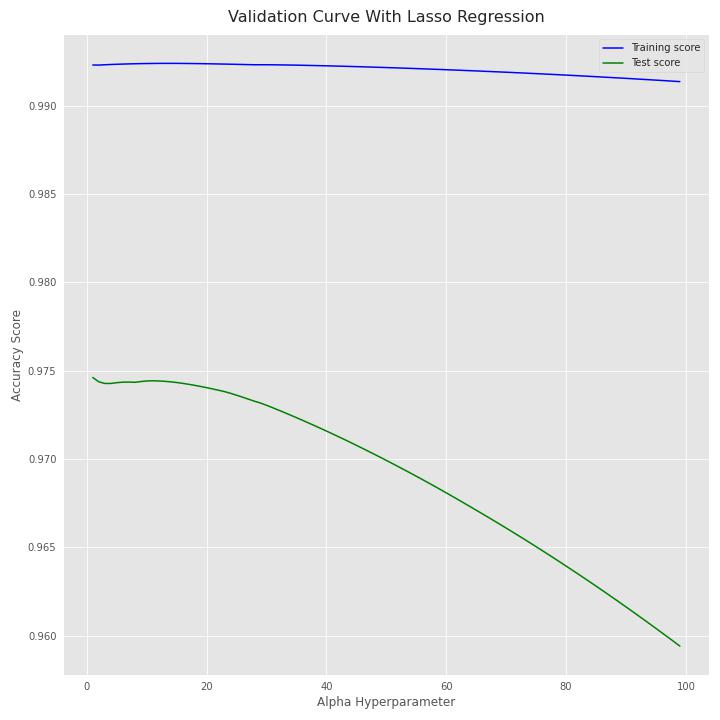

In [36]:
from sklearn.linear_model import ElasticNet

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
elastic_net = ElasticNet()

# hyperparameters
elasticnet_params = {'alpha':(0, 1, 10, 100, 1000, 10000)}

# cross validation to tune hyperparameter
g_elasticnet = GridSearchCV(elastic_net, param_grid = elasticnet_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_elasticnet.fit(X_train, y_train)

#Predict the response for test and train datasets
y_elastic_test_pred = g_elasticnet.predict(X_test)
y_elastic_train_pred = g_elasticnet.predict(X_train)

# mean error square
elastic_test_mae = mean_absolute_error(y_test, y_elastic_test_pred)
elastic_train_mae = mean_absolute_error(y_train, y_elastic_train_pred)

# best hyperparameter
g_elasticnet_param = g_elasticnet.best_params_

# The mean squared error
elastic_test_mse = mean_squared_error(y_test, y_elastic_test_pred)
elastic_train_mse = mean_squared_error(y_train, y_elastic_train_pred)

# The coefficient of determination: 1 is perfect prediction
elastic_test_r2 = r2_score(y_test, y_elastic_test_pred)
elastic_train_r2 = r2_score(y_train, y_elastic_train_pred)

# The root mean squared error
elastic_test_rmse = sqrt(mean_squared_error(y_test, y_elastic_test_pred))
elastic_train_rmse = sqrt(mean_squared_error(y_train, y_elastic_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net:", elastic_time)

Elapsed time in seconds to run Elastic Net: 7.647235690000002


In [37]:
# cross validation

cv_elastic_train = cross_val_score(g_elasticnet, X_train, y_elastic_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_elastic_test = cross_val_score(g_elasticnet, X_test, y_elastic_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_elastic = {'Training Dataset':cv_elastic_train,'Test Dataset':cv_elastic_test}
cv_elastic_results = pd.DataFrame(d_elastic).transpose()
cv_elastic_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_elastic_results)

                    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Training Dataset  0.999977  0.999997  0.999982  0.999993  0.999966
Test Dataset      0.999779  0.999917  0.999864  0.999910  0.996973


In [38]:
elastic_results = pd.DataFrame(['Elastic Net', elastic_time, g_elasticnet_param, elastic_train_mae, elastic_test_mae, elastic_train_mse, elastic_test_mse, elastic_train_rmse, elastic_test_rmse, elastic_train_r2, elastic_test_r2]).transpose()
elastic_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results, rf_results, lr_results, lasso_results, elastic_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317
5,Random Forest,5.13703,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}",272098.08402,287202.654725,5838087299257.402344,1001752946687.873413,2416213.421711,1000876.089577,0.988287,0.985868
6,Least Squares,0.125734,NaN,338326.649124,363460.661698,496339608215.53125,659256496617.980957,704513.738841,811946.116819,0.999004,0.9907
7,Lasso,6.5103,{'alpha': 100},332373.460501,365844.771762,552150584415.538086,630193197262.625488,743068.357835,793847.086826,0.998892,0.99111
8,Elastic Net,7.647236,{'alpha': 10},319578.165444,334113.831934,568177645443.713745,546648910894.975342,753775.593558,739357.09295,0.99886,0.992289


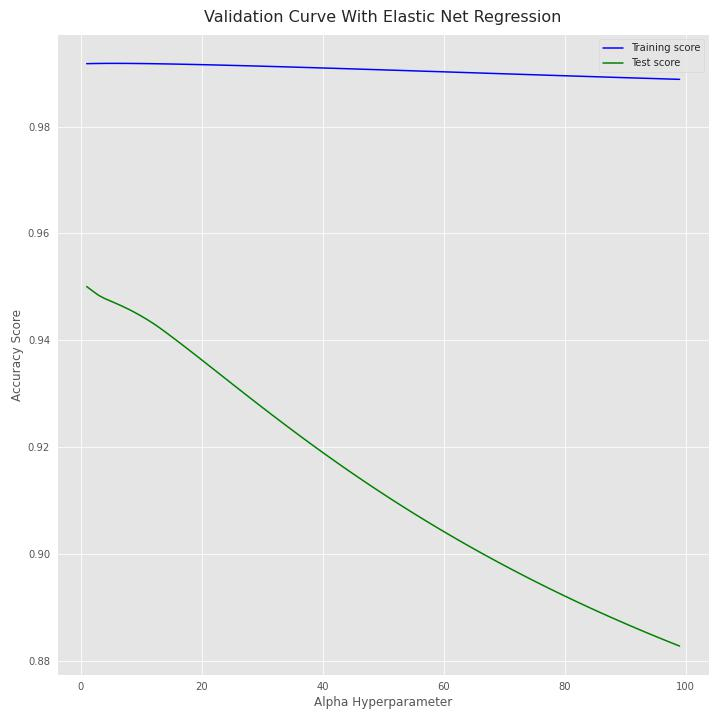

# Linear Regression (Ridge)

In [39]:
from sklearn.linear_model import Ridge

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# call the model
ridge = Ridge(random_state = 20)

# hyperparameters
ridge_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_ridge = GridSearchCV(ridge, param_grid = ridge_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_ridge.fit(X_train, y_train)

#Predict the response for test and train datasets
y_ridge_test_pred = g_ridge.predict(X_test)
y_ridge_train_pred = g_ridge.predict(X_train)

# mean error square
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)
ridge_train_mae = mean_absolute_error(y_train, y_ridge_train_pred)

# best hyperparameter
g_ridge_param = g_ridge.best_params_

# The mean squared error
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)

# The coefficient of determination: 1 is perfect prediction
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)

# The root mean squared error
ridge_test_rmse = sqrt(mean_squared_error(y_test, y_ridge_test_pred))
ridge_train_rmse = sqrt(mean_squared_error(y_train, y_ridge_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge:", ridge_time) 

Elapsed time in seconds to run Ridge: 1.259556057999987


In [40]:
# cross validation

cv_ridge_train = cross_val_score(g_ridge, X_train, y_ridge_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
cv_ridge_test = cross_val_score(g_ridge, X_test, y_ridge_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='r2')
d_ridge = {'Training Dataset':cv_ridge_train,'Test Dataset':cv_ridge_test}
cv_ridge_results = pd.DataFrame(d_ridge).transpose()
cv_ridge_results.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
print(cv_ridge_results)

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5
Training Dataset  1.0     1.0     1.0     1.0     1.0   
Test Dataset      1.0     1.0     1.0     1.0     1.0   


In [41]:
ridge_results = pd.DataFrame(['Ridge', ridge_time, g_ridge_param, ridge_train_mae, ridge_test_mae, ridge_train_mse, ridge_test_mse, ridge_train_rmse, ridge_test_rmse, ridge_train_r2, ridge_test_r2]).transpose()
ridge_results.columns = ['Method', 'Elapsed Time', 'Best Hyperparameter', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE', 'Training R2', 'Test R2']
results = pd.concat([svr_results, grad_boosting_results, reg_bagging_results, decision_tree_results, xg_boosting_results, rf_results, lr_results, lasso_results, elastic_results, ridge_results], axis = 0).reset_index().drop(columns='index')
results

,Method,Elapsed Time,Best Hyperparameter,Training MAE,Test MAE,Training MSE,Test MSE,Training RMSE,Test RMSE,Training R2,Test R2
0,SVR,1.139663,"{'C': 200, 'degree': 1, 'kernel': 'poly'}",5157786.787802,3534478.768448,514532371971257.3125,77841452516670.015625,22683306.019433,8822780.316696,-0.032345,-0.098097
1,Gradient Boosting,0.352697,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}",321506.599935,688084.493569,1444701116924.630371,16050224885895.796875,1201957.202618,4006273.19162,0.996066,0.95754
2,Bagging Regression,3.656025,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}",362929.010297,339005.095382,10341048842340.533203,1381357079064.322998,3215750.121253,1175311.481721,0.979252,0.980513
3,Decision Tree,0.091117,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.0,483638.403197,0.0,2573281401537.532715,0.0,1604145.068732,1.0,0.963699
4,XGBoosting,29.736443,"{'alpha': 0.7, 'eta': 0.2, 'gamma': 3, 'max_depth': 12, 'max_leaves': 4, 'min_child_weight': 3}",61318.749458,367983.32859,76559084596.520309,1891462438176.709717,276693.123508,1375304.489259,0.999846,0.973317
5,Random Forest,5.13703,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}",272098.08402,287202.654725,5838087299257.402344,1001752946687.873413,2416213.421711,1000876.089577,0.988287,0.985868
6,Least Squares,0.125734,NaN,338326.649124,363460.661698,496339608215.53125,659256496617.980957,704513.738841,811946.116819,0.999004,0.9907
7,Lasso,6.5103,{'alpha': 100},332373.460501,365844.771762,552150584415.538086,630193197262.625488,743068.357835,793847.086826,0.998892,0.99111
8,Elastic Net,7.647236,{'alpha': 10},319578.165444,334113.831934,568177645443.713745,546648910894.975342,753775.593558,739357.09295,0.99886,0.992289
9,Ridge,1.259556,{'alpha': 10},271064.88214,348629.545319,268251993680.587189,1397452861108.718262,517930.491167,1182139.103959,0.999192,0.99696


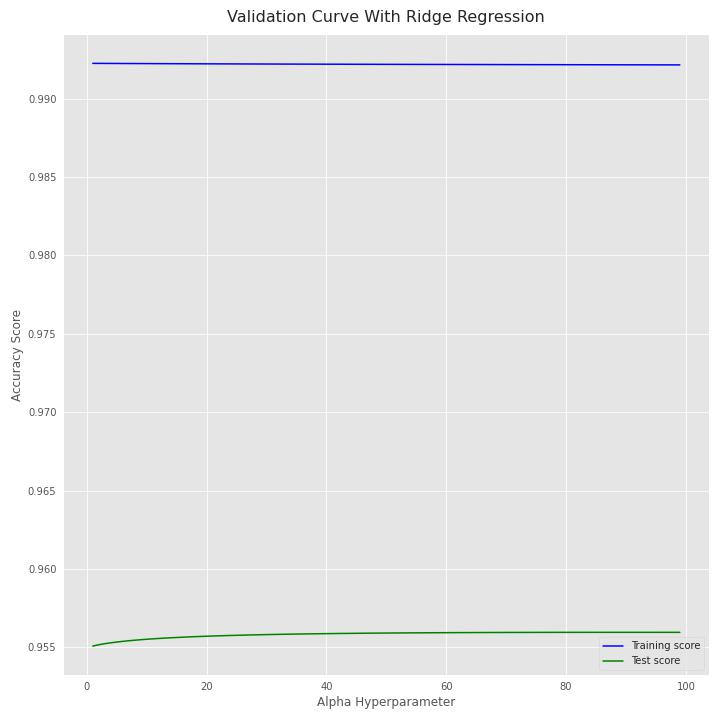

# Statistical Results

Text(0.5, 0, 'Test MAE')

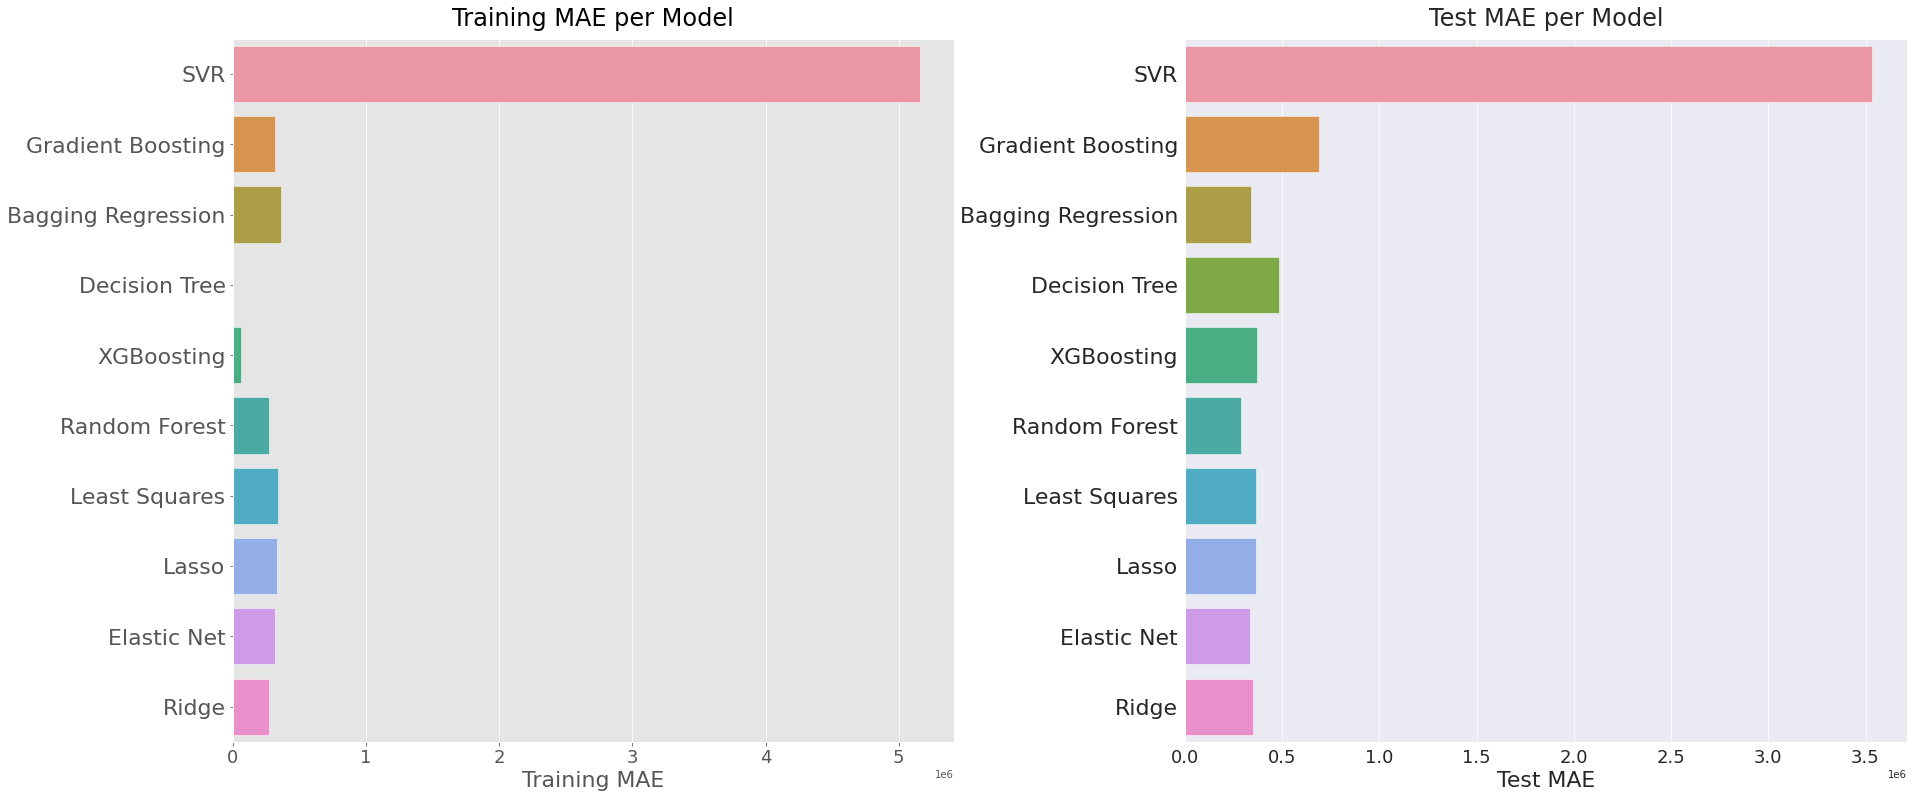

In [42]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 2)
gs.update(wspace = 0.32, hspace = 0.32)

# Training MAE
plt.style.use('ggplot')
fig = plt.figure(figsize =([30, 30])) 
ax1 = plt.subplot(gs[0,0])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MAE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MAE per Model", size=24, y=1.01)
plt.xlabel("Training MAE", size=22)

# Test MAE

ax1 = plt.subplot(gs[0,1])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MAE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MAE per Model", size=24, y=1.01)
plt.xlabel("Test MAE", size=22)

Text(0.5, 0, 'Test MSE')

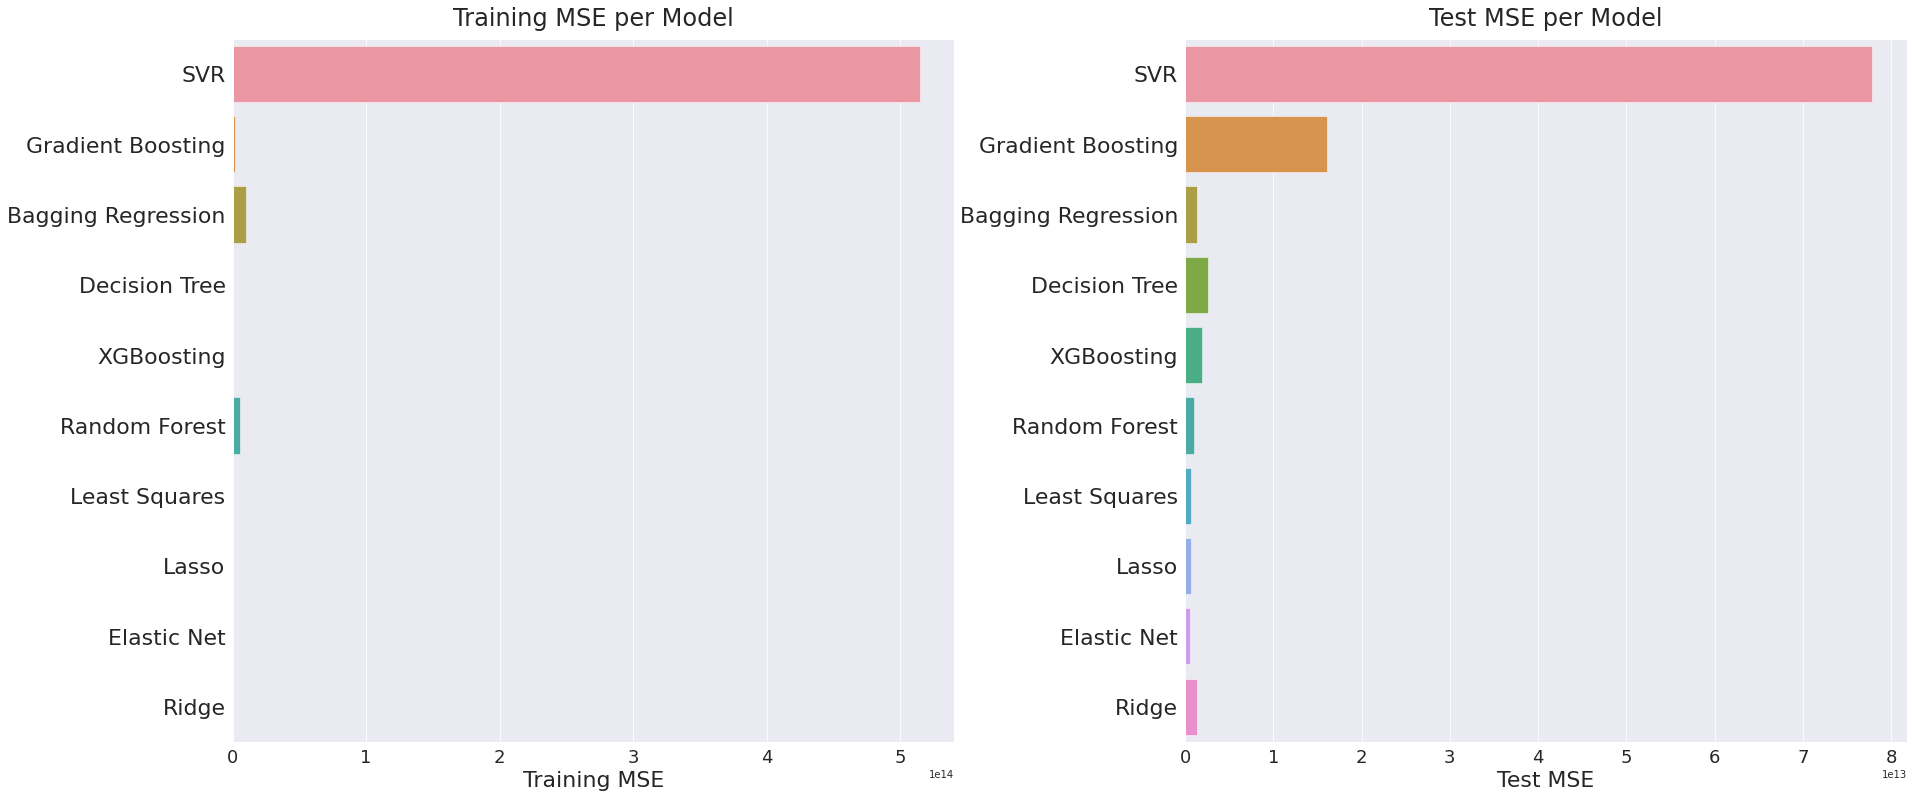

In [43]:
gs = GridSpec(2, 2)
gs.update(wspace = 0.32, hspace = 0.32)

# Training MSE

fig = plt.figure(figsize =([30, 30])) 
ax1 = plt.subplot(gs[0,0])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MSE per Model", size=24, y=1.01)
plt.xlabel("Training MSE", size=22)

# Test MSE

ax1 = plt.subplot(gs[0,1])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)

Text(0.5, 0, 'Test RMSE')

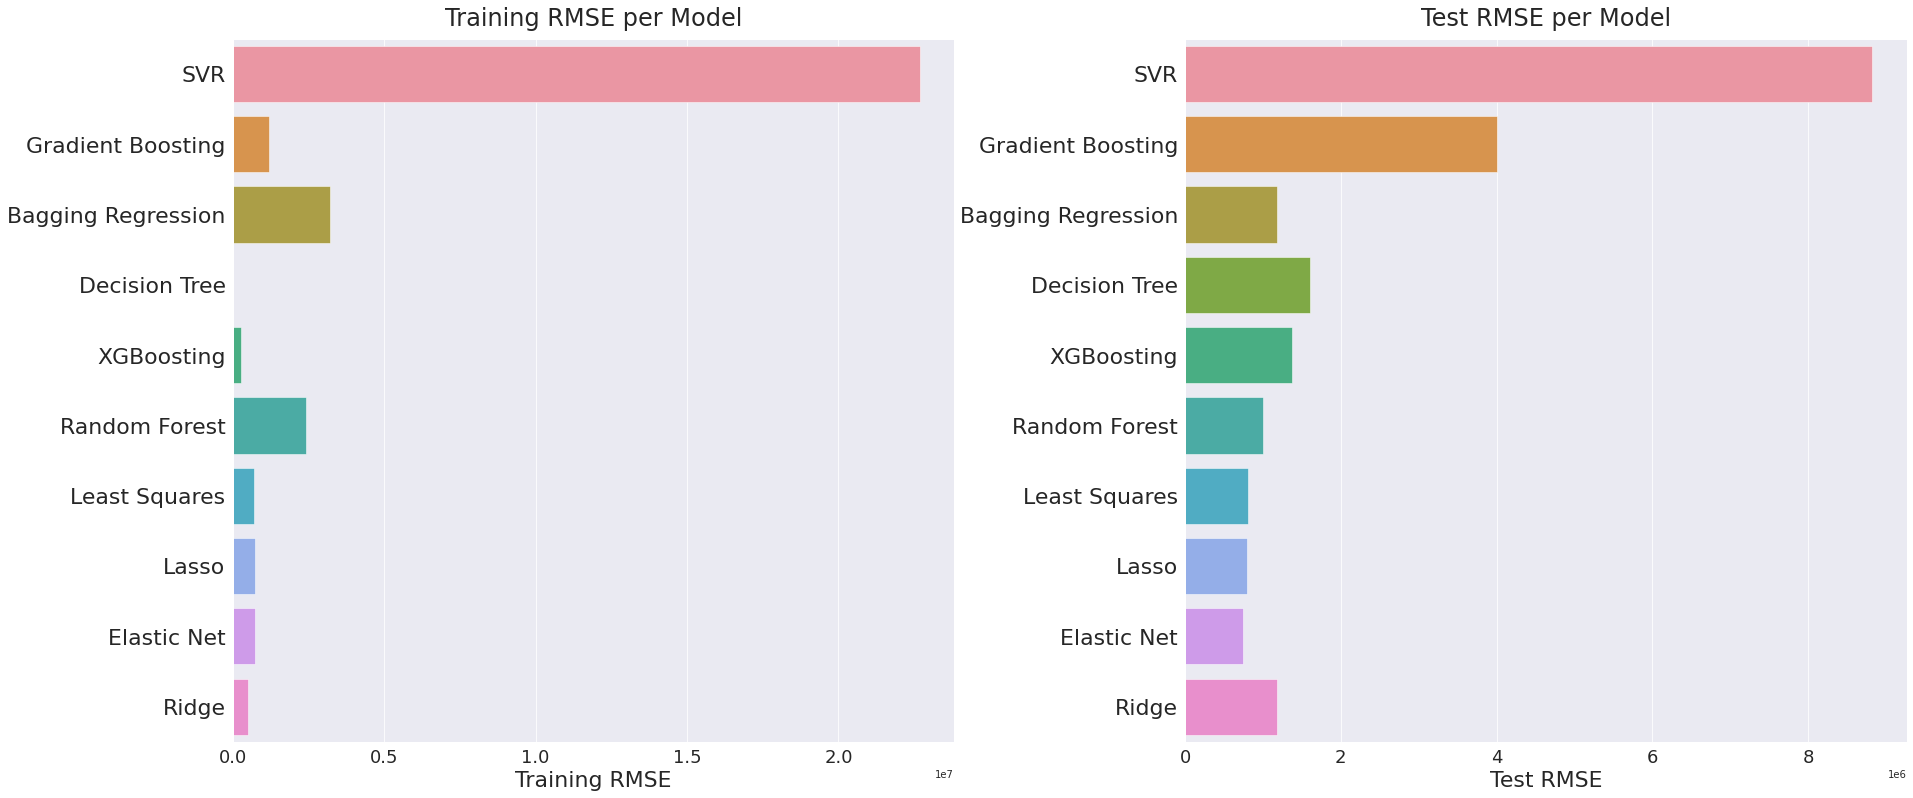

In [44]:
gs = GridSpec(2, 2)
gs.update(wspace = 0.32, hspace = 0.32)

# Training RMSE

fig = plt.figure(figsize =([30, 30])) 
ax1 = plt.subplot(gs[0,0])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training RMSE per Model", size=24, y=1.01)
plt.xlabel("Training RMSE", size=22)

# Test RMSE

ax1 = plt.subplot(gs[0,1])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model", size=24, y=1.01)
plt.xlabel("Test RMSE", size=22)

Text(0.5, 0, 'Test R2')

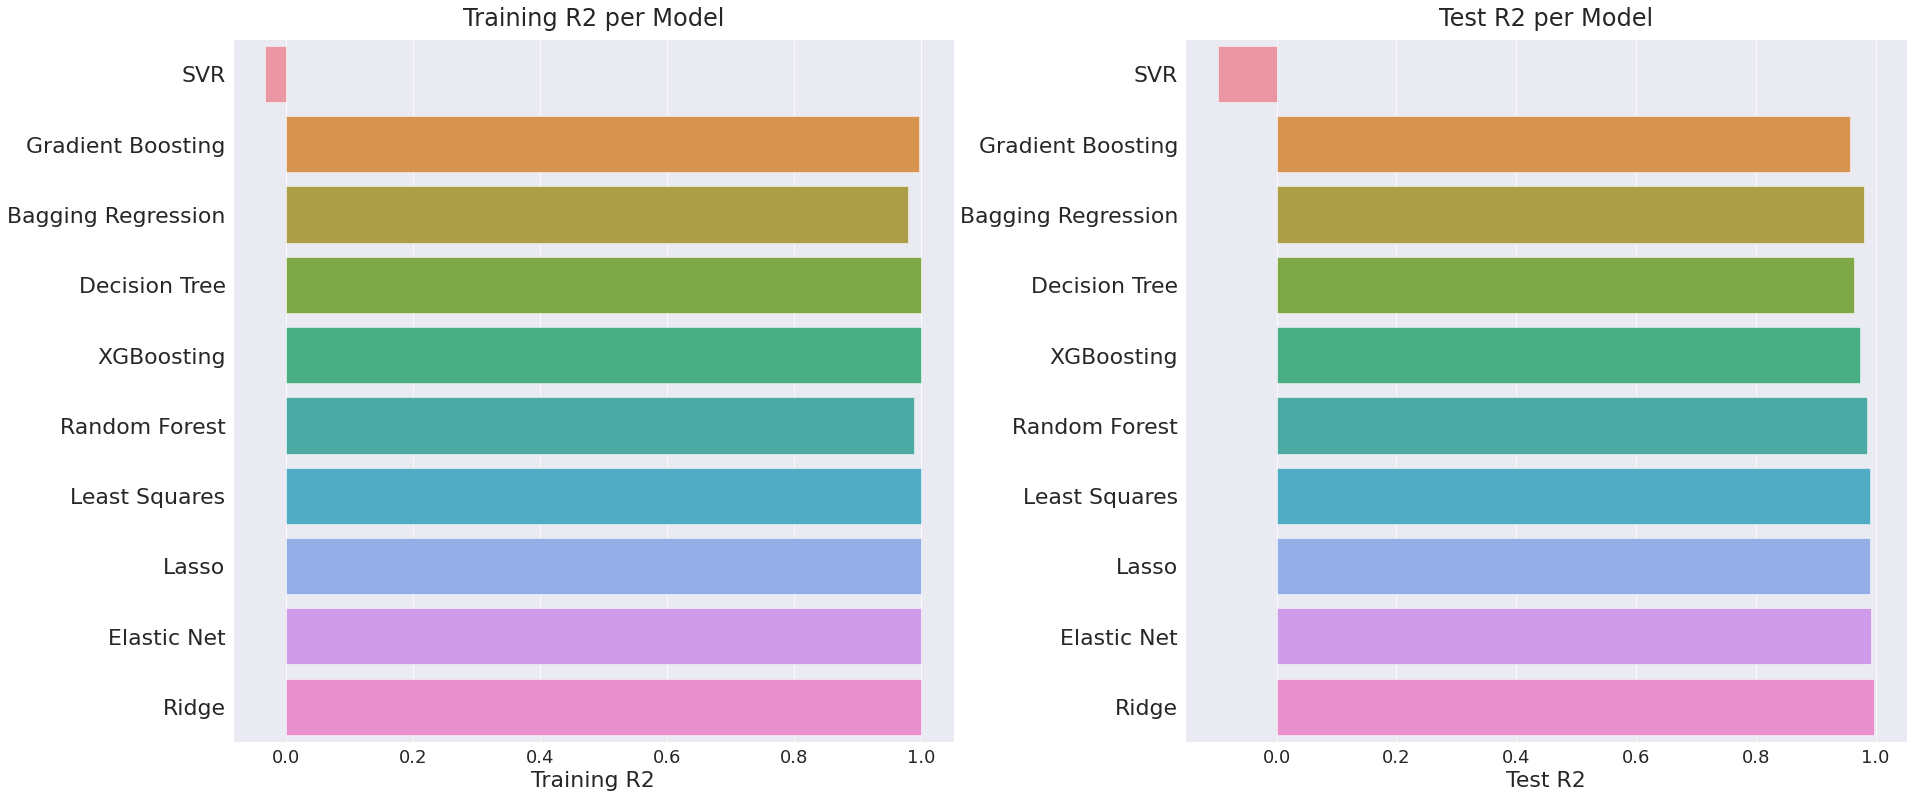

In [45]:
gs = GridSpec(2, 2)
gs.update(wspace = 0.32, hspace = 0.32)

# Training R2

fig = plt.figure(figsize =([30, 30])) 
ax1 = plt.subplot(gs[0,0])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training R2"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training R2 per Model", size=24, y=1.01)
plt.xlabel("Training R2", size=22)

# Test R2

ax1 = plt.subplot(gs[0,1])
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test R2"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test R2 per Model", size=24, y=1.01)
plt.xlabel("Test R2", size=22)

# Final Model Decision

The **Ridge model** returns us with the best accuracy on the Test Set based on R2.

# Importance of ENERGYSTARScore

We notice that **ENERGYSTARScore** variable has high importance in the model when predicting *SiteEnergyUseWN(kBtu)*.

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ridge_coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ridge.fit(X_train, y_train).coef_))],levels=0, axis = 1)
ridge_coefficients.columns = [['Variables', 'Coefficients']]
scaled_coeff = scaler.fit(ridge_coefficients['Coefficients'])
scaled_coeff = scaler.transform(ridge_coefficients['Coefficients'])
scaled_coeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(scaled_coeff)], axis = 1).set_axis(['Variables', 'Coefficients'], axis='columns')
scaled_coeff.sort_values(by=['Coefficients'], ascending=False).reset_index().drop(columns='index').style.apply(lambda x: ['background: lightgreen' if (x['Variables'] == 'ENERGYSTARScore') else '' for i in x], axis=1)

,Variables,Coefficients
0,PrimaryPropertType_Medical Office,1.000000
1,Neighborhood_DOWNTOWN,0.911455
2,Neighborhood_CENTRAL,0.830542
3,SourceEUIWN(kBtu/sf),0.802501
4,PrimaryPropertType_Supermarket / Grocery Store,0.796697
5,BuildingType_Campus,0.796552
6,PrimaryPropertType_High-Rise Multifamily,0.768924
7,SiteEUI(kBtu/sf),0.758654
8,PrimaryPropertType_Refrigerated Warehouse,0.751702
9,PrimaryPropertType_Warehouse,0.722904
